In [12]:
#!/usr/bin/env python3
#DEPENDS: /home/anne/tmpanne/AEM_output/baseline_classreport.json, /home/anne/tmpanne/AEM_output/baseline_classreport.json,
#CREATES: None
#TITLE: Data cleaner (cleans output of ML algorithms)
#DESCRIPTION:Creates a clean data frame with results of ML on different vectorizers, classifiers, and parameter settings.
#PIPE: TRUE

import sys
print(sys.stdin.read().upper())

import seaborn as sns
import matplotlib.pyplot as plt
import json
import logging
import pandas as pd

def get_data(file):
    path_to_data='/home/anne/tmpanne/AEM_output/'

    fname_sml = '{}{}'.format(path_to_data, file)
    with open(fname_sml) as handle:
        class_report =  json.loads(handle.read())

    appended_data = []

    for i in class_report:
        data = pd.DataFrame.from_dict(i)
        appended_data.append(data)
    df = pd.concat(appended_data)
    df['indicators'] = df.index
    return df

def merge_baseline_embedding(dataset):
    df_baseline = get_data('baseline_classreport_dataset_{}_embed_size_large.json'.format(dataset))
    df_embeddings = get_data('embeddings_classreport_dataset_{}_embed_size_large.json'.format(dataset))
    df = pd.concat([df_baseline , df_embeddings])
    return df

def clean_data_metrics(dataset):
    df = merge_baseline_embedding(dataset)
    i = ['precision', 'recall', 'support', 'f1-score']
    df[df['indicators'].isin(i)]
    df.reset_index(inplace=True)
    d = df[df['indicators'].isin(i)].groupby(['classifier', 'model', 'indicators', 'vectorizer']).max()
    return d

def clean_data_parameters(dataset):
    i = ['clf__C', 'clf__fit_intercept', 'clf__loss', 'clf__max_iter','clf__alpha', 'clf__penalty', 'clf__gamma', 'clf__kernel', 'clf__max_features']

    df = merge_baseline_embedding(dataset)
    df = df[df['indicators'].isin(i)].groupby(['classifier', 'model', 'indicators', 'vectorizer']).max()
    df.reset_index(inplace=True)
    e = df.groupby(['classifier', 'model','vectorizer']).apply(lambda g: pd.Series(g.parameters.values, index= + g.indicators.astype(str)))

    parameters = pd.DataFrame(e)
    parameters.reset_index(inplace=True)

    parameters['unique_'] = parameters['classifier'] + "_" + parameters['model']  + "_" +  parameters['vectorizer']

    p = parameters.pivot(index='unique_', columns='indicators', values=0)

    parameters = parameters.groupby(['classifier', 'model', 'vectorizer']).max()
    p.reset_index(inplace=True)
    len(p) == len(parameters)
    parameters.reset_index(inplace=True)
    parameters = pd.merge(p, parameters, on='unique_')
    return parameters

def get_cleaned_data(dataset):
    df = pd.merge(clean_data_metrics(dataset), clean_data_parameters(dataset), on=['classifier','model','vectorizer'], how='left')
    df.rename(columns={'index': 'metrics'}, inplace=True)
    print("..........loaded the data frame........")
    return df

In [13]:
import sys  
sys.path.append('src/data-processing/')  
from datacleaning import * 
import numpy as np

In [14]:
output_path = 'output/'

In [16]:
b =  get_cleaned_data("burscher")
b.head()
b.set_index('model', inplace=True)

..........loaded the data frame........


In [17]:
# select metric of interest
df = b[b['metrics'] == 'f1-score']
averaging = 'macro avg'
#averaging = 'weighted avg'
#averaging = 'accuracy'

results = df[df.groupby(['model'])[averaging].transform(max) == df[averaging]].sort_values(averaging)
results[['classifier', 'vectorizer', averaging , 'clf__alpha', 'clf__fit_intercept', 'clf__gamma', 'clf__kernel',
       'clf__loss', 'clf__max_features', 'clf__max_iter', 'clf__penalty']]

results.reset_index(inplace=True)

No handles with labels found to put in legend.


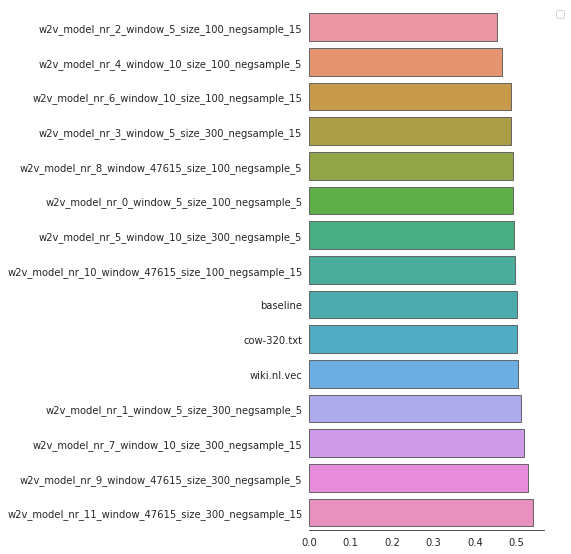

In [18]:
ax = sns.catplot(x="macro avg", y="model", edgecolor=".4", data=results, kind="bar",  height=8)
ax.set_titles("{col_name} {col_var}").despine(left=True)
ax.set(xlabel=None, ylabel=None)
ax = sns.set_style("white")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("{}downstream_Burscher.png".format(output_path),  bbox_inches = 'tight')

In [19]:
v =  get_cleaned_data("vermeer")
v.head()
v.set_index('model', inplace=True)

..........loaded the data frame........


In [20]:
# select metric of interest
df = v[v['metrics'] == 'f1-score']
averaging = 'macro avg'

results = df[df.groupby(['model'])[averaging].transform(max) == df[averaging]].sort_values(averaging)
results[['classifier', 'vectorizer', averaging , 'clf__alpha', 'clf__fit_intercept', 'clf__gamma', 'clf__kernel',
       'clf__loss', 'clf__max_features', 'clf__max_iter', 'clf__penalty']]

results.reset_index(inplace=True)

No handles with labels found to put in legend.


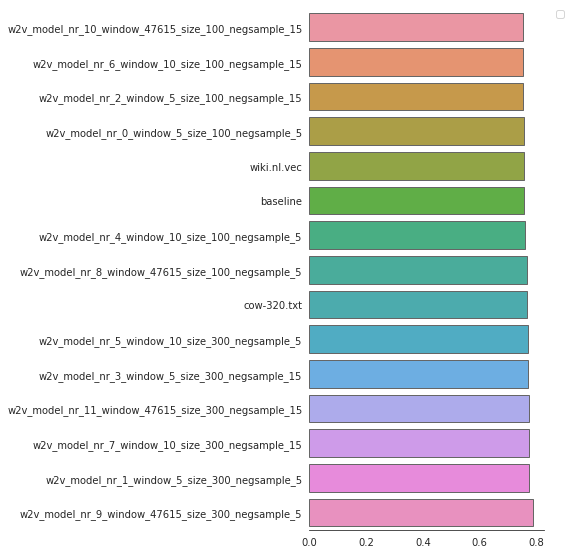

In [21]:
ax = sns.catplot(x="macro avg", y="model", edgecolor=".4", data=results, kind="bar",  height=8)
ax.set_titles("{col_name} {col_var}").despine(left=True)
ax.set(xlabel=None, ylabel=None)
ax = sns.set_style("white")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("{}downstream_Vermeer.png".format(output_path),  bbox_inches = 'tight')

In [59]:
ax = sns.catplot(x="9", y="model", edgecolor=".4", data=results, kind="bar",  height=8)
ax.set_titles("{col_name} {col_var}").despine(left=True)
ax.set(xlabel=None, ylabel=None)
ax = sns.set_style("white")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ValueError: Could not interpret input '9'

ValueError: Could not interpret input 'model'

No handles with labels found to put in legend.


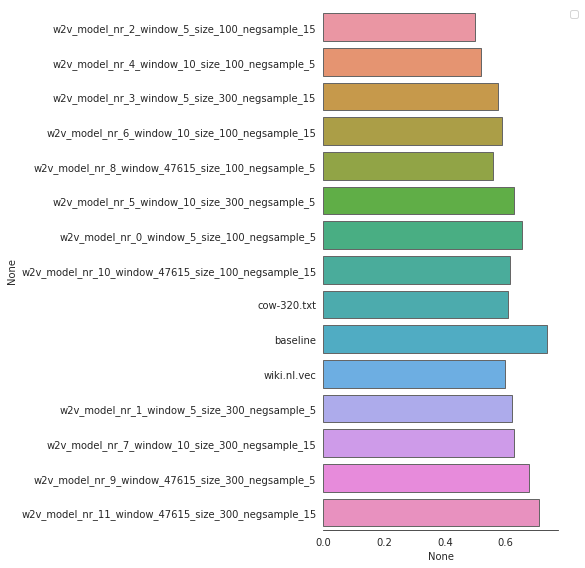

In [61]:
ax = sns.catplot(x="9", y="model", edgecolor=".4", data=results, kind="bar",  height=8)
ax.set_titles("{col_name} {col_var}").despine(left=True)
ax.set(xlabel=None, ylabel=None)
ax = sns.set_style("white")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [74]:
pathtodata='/home/anne/tmpanne/AEM_output'
dataset = 'vermeer'
classifier = 'SGDClassifier'

base = "{}/embeddings_true_predicted_dataset_{}_embed_size_large.json".format(pathtodata, dataset)
print(base)
df = pd.read_json(base)
#df = df[df['Classifier'] == classifier]
#return df
df

/home/anne/tmpanne/AEM_output/embeddings_true_predicted_dataset_vermeer_embed_size_large.json


,actual,classifier,model,predicted,vectorizer
0,"[3, 2, 1, 1, 1, 3, 4, 3, 1, 3, 3, 4, 3, 3, 3, ...",BernoulliNB,wiki.nl.vec,"[3, 1, 1, 3, 1, 3, 4, 3, 1, 3, 3, 1, 3, 3, 3, ...",w2v_count
1,"[3, 2, 1, 1, 1, 3, 4, 3, 1, 3, 3, 4, 3, 3, 3, ...",Passive Agressive,wiki.nl.vec,"[3, 2, 1, 2, 1, 3, 4, 3, 1, 3, 3, 2, 3, 3, 3, ...",w2v_count
10,"[3, 2, 1, 1, 1, 3, 4, 3, 1, 3, 3, 4, 3, 3, 3, ...",BernoulliNB,w2v_model_nr_5_window_10_size_300_negsample_5,"[3, 2, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, ...",w2v_count
100,"[3, 2, 1, 1, 1, 3, 4, 3, 1, 3, 3, 4, 3, 3, 3, ...",BernoulliNB,cow-320.txt,"[3, 2, 3, 3, 1, 3, 4, 3, 1, 3, 3, 2, 3, 3, 3, ...",w2v_count
101,"[3, 2, 1, 1, 1, 3, 4, 3, 1, 3, 3, 4, 3, 3, 3, ...",Passive Agressive,cow-320.txt,"[3, 2, 1, 3, 1, 3, 4, 3, 1, 3, 3, 1, 3, 3, 3, ...",w2v_count
102,"[3, 2, 1, 1, 1, 3, 4, 3, 1, 3, 3, 4, 3, 3, 3, ...",SGDClassifier,cow-320.txt,"[3, 2, 1, 2, 1, 3, 4, 3, 1, 3, 3, 2, 3, 3, 3, ...",w2v_count
103,"[3, 2, 1, 1, 1, 3, 4, 3, 1, 3, 3, 4, 3, 3, 3, ...",SVM,cow-320.txt,"[3, 2, 1, 3, 1, 3, 4, 3, 1, 3, 3, 1, 3, 3, 3, ...",w2v_count
104,"[3, 2, 1, 1, 1, 3, 4, 3, 1, 3, 3, 4, 3, 3, 3, ...",ET,cow-320.txt,"[3, 2, 1, 3, 1, 3, 4, 3, 1, 3, 3, 2, 3, 3, 3, ...",w2v_count
105,"[3, 2, 1, 1, 1, 3, 4, 3, 1, 3, 3, 4, 3, 3, 3, ...",BernoulliNB,cow-320.txt,"[3, 2, 1, 3, 1, 3, 4, 3, 1, 3, 3, 1, 3, 3, 3, ...",w2v_tfidf
106,"[3, 2, 1, 1, 1, 3, 4, 3, 1, 3, 3, 4, 3, 3, 3, ...",Passive Agressive,cow-320.txt,"[3, 2, 1, 3, 1, 3, 4, 3, 1, 3, 3, 1, 3, 3, 3, ...",w2v_tfidf


In [62]:
df = pd.read_json('/home/anne/tmpanne/AEM_output/embeddings_true_predicted_dataset_vermeer_embed_size_large.json')

In [75]:


class get_heatmaps():
    '''Get those heatmaps'''

    def __init__(self, approach, sample, classifier = None, vect=None):
        self.approach = approach
        self.sample = sample
        self.classifier = classifier
        self.vect = vect

    def get_data(self):

        base = "{}/embeddings_true_predicted_dataset_{}_embed_size_large.json".format(pathtodata, dataset)
        df = pd.read_json(base)
        df = df[df['classifier'] == self.classifier]
        return df

    def confusion_matrix(self):
        df = self.get_data()
        df.replace(self.translator, inplace=True)
        df.replace(d2, inplace=True)
        confusion_matrix = pd.crosstab(df['Actual label'], df['Predicted label'], rownames=['True'], colnames=['Predicted'])
        cmn = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
        return cmn

    def get_heatmap(self):
        label = "Values in the diagonal represent the relative times that the manual coding (’true label’ - Y axis ) is equal to the classifier (X axis). Diagonal values indicate the relative number of correct predictions: The higher the values in diagonal, the better the prediction. Off-diagonal values indicate misclassification. Darker colours indicate higher values. Due to class imbalance, values are normalised to facilitate visual understanding. Values below 0.1 are not visualised. "
        cmn = self.confusion_matrix()
        cmn = cmn.round(1)
        fig, ax = plt.subplots(figsize=(10,10))
        heatmap = sns.heatmap(cmn, annot=True, annot_kws={"size": 10}, fmt='.1f',  cmap="BuGn", mask=(cmn<0.1))
    #    heatmap = sns.heatmap(cmn, annot=True, annot_kws={"size": 10}, fmt='.1f',  cmap="gist_gray_r", linecolor='black', mask=(cmn<0.1))
        for _, spine in heatmap.spines.items():
            spine.set_visible(True)
        fs = 16
        heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fs)
        heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fs)
        #plt.title("Normalized Confusion Matrix (Classifier: {}) ".format(self.approach), fontsize= 16)
        plt.title(None)
        plt.ylabel('True label (Manual coding)', fontsize=fs)
        plt.xlabel('Predicted label', fontsize=fs)
        return fig

    def get_figure_save(self):
        #logger.info('{}'.format(label))
        figure = self.get_heatmap()
        if self.approach == 'SML':
            fname = '{}Heatmap_{}_{}_{}'.format(OUTPUTFIGURES, self.approach, self.classifier, self.sample)
        else:
             fname = '{}Heatmap_{}_{}'.format(OUTPUTFIGURES, self.approach, self.sample)
        figure.savefig(fname, bbox_inches='tight')
        print('Saved figure as: {}'.format(fname))
        


In [76]:
pathtodata='/home/anne/tmpanne/AEM_output'
dataset = 'vermeer'
classifier = 'SGDClassifier'


a = get_heatmaps(classifier='SGDClassifier', vect='w2v_count', approach = 'SML', sample='Vermeer')

In [77]:
a.get_heatmap()

AttributeError: 'get_heatmaps' object has no attribute 'translator'

In [17]:
# select metric of interest
df = v[v['metrics'] == 'f1-score']
averaging = 'micro avg'

results = df[df.groupby(['model'])[averaging].transform(max) == df[averaging]].sort_values(averaging)

results[['classifier', 'vectorizer', averaging , 'clf__alpha', 'clf__fit_intercept', 'clf__gamma', 'clf__kernel',
       'clf__loss', 'clf__max_features', 'clf__max_iter', 'clf__penalty']]

NameError: name 'v' is not defined

In [44]:
df.head()
df.set_index('model', inplace=True)

,classifier,model,vectorizer,metrics,1,2,3,4,macro avg,micro avg,...,clf__C,clf__alpha,clf__fit_intercept,clf__gamma,clf__kernel,clf__loss,clf__max_features,clf__max_iter,clf__penalty,indicators
0,ET,baseline,Count,f1-score,0.700422,0.458333,0.816374,0.535714,0.627711,0.724928,...,NaN,NaN,NaN,NaN,NaN,NaN,auto,NaN,NaN,clf__max_features
1,ET,baseline,Tfidf,f1-score,0.735043,0.494737,0.815155,0.475248,0.630046,0.733524,...,NaN,NaN,NaN,NaN,NaN,NaN,auto,NaN,NaN,clf__max_features
2,ET,baseline,Count,precision,0.674797,0.354839,0.930667,0.394737,0.588760,0.724928,...,NaN,NaN,NaN,NaN,NaN,NaN,auto,NaN,NaN,clf__max_features
3,ET,baseline,Tfidf,precision,0.699187,0.379032,0.946667,0.315789,0.585169,0.733524,...,NaN,NaN,NaN,NaN,NaN,NaN,auto,NaN,NaN,clf__max_features
4,ET,baseline,Count,recall,0.728070,0.647059,0.727083,0.833333,0.733886,0.724928,...,NaN,NaN,NaN,NaN,NaN,NaN,auto,NaN,NaN,clf__max_features


In [83]:
# select metric of interest
df = df[df['metrics'] == 'f1-score']

results = df[df.groupby(['model'])['weighted avg'].transform(max) == df['weighted avg']].sort_values('weighted avg')
results[['classifier', 'vectorizer', 'weighted avg', 'clf__alpha', 'clf__fit_intercept', 'clf__gamma', 'clf__kernel',
       'clf__loss', 'clf__max_features', 'clf__max_iter', 'clf__penalty']]

,classifier,vectorizer,weighted avg,clf__alpha,clf__fit_intercept,clf__gamma,clf__kernel,clf__loss,clf__max_features,clf__max_iter,clf__penalty
model,,,,,,,,,,,
w2v_model_nr_10_window_47615_size_100_negsample_15,SGDClassifier,w2v_count,0.817128,0.01,NaN,NaN,NaN,NaN,NaN,30,elasticnet
w2v_model_nr_2_window_5_size_100_negsample_15,SVM,w2v_tfidf,0.817608,NaN,NaN,0.001,rbf,NaN,NaN,NaN,NaN
baseline,Passive Agressive,Tfidf,0.819430,NaN,True,NaN,NaN,hinge,NaN,15,NaN
w2v_model_nr_8_window_47615_size_100_negsample_5,SGDClassifier,w2v_tfidf,0.821569,0.01,NaN,NaN,NaN,NaN,NaN,30,l2
wiki.nl.vec,SGDClassifier,w2v_count,0.823054,1e-05,NaN,NaN,NaN,NaN,NaN,30,elasticnet
cow-320.txt,SVM,w2v_tfidf,0.826648,NaN,NaN,0.001,linear,NaN,NaN,NaN,NaN
w2v_model_nr_1_window_5_size_300_negsample_5,SVM,w2v_tfidf,0.826838,NaN,NaN,0.001,rbf,NaN,NaN,NaN,NaN
w2v_model_nr_3_window_5_size_300_negsample_15,SVM,w2v_tfidf,0.826907,NaN,NaN,0.001,rbf,NaN,NaN,NaN,NaN
w2v_model_nr_4_window_10_size_100_negsample_5,SVM,w2v_tfidf,0.826925,NaN,NaN,0.001,rbf,NaN,NaN,NaN,NaN
